In [1]:
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup
import requests

The first step is to grab index files for quarters. Later we will iterate thru multiple quarters, but first the code should just import a single quarter.

In [2]:
def get_EDGAR_index(year,quarter):
    assert(int(year)>1933), 'Year before SEC.'
    assert(int(year)<=datetime.now().year), 'Year in future'
    assert(0<int(quarter)<5), 'Invalid quarter.'
    
    
    url = 'https://www.sec.gov/Archives/edgar/full-index/{:}/QTR{:}/master.idx'
    url = url.format(int(year),int(quarter))
    return pd.read_csv(url,sep='|',
                       skip_blank_lines=True,
                       skiprows=[0,1,2,3,4,5,6,7,8,10],
                       parse_dates=['Date Filed'])
df = get_EDGAR_index(2020,2)
df.head()

,CIK,Company Name,Form Type,Date Filed,Filename
0,1000045,NICHOLAS FINANCIAL INC,8-K,2020-04-03,edgar/data/1000045/0001564590-20-015116.txt
1,1000045,NICHOLAS FINANCIAL INC,8-K,2020-04-15,edgar/data/1000045/0001564590-20-016816.txt
2,1000097,"KINGDON CAPITAL MANAGEMENT, L.L.C.",13F-HR,2020-05-15,edgar/data/1000097/0001000097-20-000005.txt
3,1000177,NORDIC AMERICAN TANKERS Ltd,20-F,2020-04-16,edgar/data/1000177/0000919574-20-002937.txt
4,1000177,NORDIC AMERICAN TANKERS Ltd,6-K,2020-05-29,edgar/data/1000177/0000919574-20-003849.txt


I am pulling a sample to verify that the code can successfully pull all filings for an individual company. To acheive this, I will randomly select a company, show the results from the 2020 Q2 EDGAR filing, then manually compare using the company page on EDGAR.

In [3]:
comps = pd.read_pickle('Investment Company Series and Class Information.p')

sample = comps.sample(random_state=42)

series_id = sample['series_id'].values[0]
cik = sample['cik'].values[0]
sample

,reporting_file_number,cik,entity_name,entity_org_type,series_id,series_name,class_id,class_name,class_ticker,address_1,city,zip_code,state,address_2
30275,811-05309,0000820892,NUVEEN INVESTMENT FUNDS INC,30,S000005545,Nuveen Inflation Protected Securities Fund,C000015084,Class I,FYIPX,333 WEST WACKER DR.,CHICAGO,60606,IL,[NULL]


Important note: The import function automatically converts the CIK to an int. This behavior can be supressed, but I like it that way. It is important to convert CIKs to ints before comparing them.

In [4]:
mask = df['CIK'] == int(cik)
df[mask]

,CIK,Company Name,Form Type,Date Filed,Filename
156201,820892,NUVEEN INVESTMENT FUNDS INC,485APOS,2020-05-08,edgar/data/820892/0001193125-20-137377.txt
156202,820892,NUVEEN INVESTMENT FUNDS INC,485BPOS,2020-04-29,edgar/data/820892/0001193125-20-125236.txt
156203,820892,NUVEEN INVESTMENT FUNDS INC,485BPOS,2020-05-21,edgar/data/820892/0001193125-20-148177.txt
156204,820892,NUVEEN INVESTMENT FUNDS INC,497J,2020-04-30,edgar/data/820892/0001193125-20-127494.txt
156205,820892,NUVEEN INVESTMENT FUNDS INC,497K,2020-04-30,edgar/data/820892/0001193125-20-127499.txt
156206,820892,NUVEEN INVESTMENT FUNDS INC,497K,2020-04-30,edgar/data/820892/0001193125-20-127501.txt
156207,820892,NUVEEN INVESTMENT FUNDS INC,497K,2020-04-30,edgar/data/820892/0001193125-20-127502.txt
156208,820892,NUVEEN INVESTMENT FUNDS INC,497K,2020-05-01,edgar/data/820892/0001683863-20-007924.txt
156209,820892,NUVEEN INVESTMENT FUNDS INC,497K,2020-05-29,edgar/data/820892/0001193125-20-154849.txt
156210,820892,NUVEEN INVESTMENT FUNDS INC,497K,2020-05-29,edgar/data/820892/0001193125-20-154855.txt


CIK alone is no damn good. We need to specify the series number because most mutual fund companies have more than one fund. This is the same reason many canned APIs do not work well for series information.

In [44]:
def get_filings(CIK,page:int=0,n_records:int=100):
    assert(type(page)==int),'Page must be an int.'
    assert(type(n_records==int)), 'n_records must be an int.'
    
    ed_url = 'https://www.sec.gov/cgi-bin/browse-edgar'
    r = requests.get(ed_url,params = dict(
        action='getcompany',
        CIK=CIK,
        count=n_records,
        start=page*n_records
    ))
    assert(r),r
    
    try:
        soup = BeautifulSoup(r.text,'lxml')
        
        # Look if request is valid
        if "Invalid parameter" in [h.text for h in soup.findAll('h1')]:
            return 'Invalid parameter'
    
        # Get table of filings and parse
        filings = list(soup.find(class_="tableFile2").find_all('tr'))
        header = filings.pop(0)# Drop first row which only contains file headers.
        res = []
        
        if len(filings)>0:
            for f in filings:
                f = list(f.findAll('td'))
                t_dict = dict()
                t_dict['Filings'] = f[0].text
                t_dict['Format'] = f[1].find('a').get('href')
                t_dict['Filing Date'] = f[3].text
                t_dict['File/Film Number'] = f[4]
                res += [t_dict]
                
            res = pd.DataFrame(res)
            res['Filing Date'] = pd.to_datetime(res['Filing Date'])
            return res
        else:
            return ('No results.')
    except:
        print('ERROR PARSING!')
        return r


get_filings('S000005545')

,Filings,Format,Filing Date,File/Film Number
0,N-CEN,/Archives/edgar/data/820892/000114554919033375...,2019-09-12,"[[811-05309], [], 191089713 ]"
1,24F-2NT,/Archives/edgar/data/820892/000108383919000022...,2019-09-11,"[[033-16905], [], 191087624 ]"
2,N-PX,/Archives/edgar/data/820892/000119312519223912...,2019-08-19,"[[811-05309], [], 191034792 ]"
3,497,/Archives/edgar/data/820892/000119312519174339...,2019-06-17,"[[033-16905], [], 19900614 ]"
4,NPORT-EX,/Archives/edgar/data/820892/000175272419051260...,2019-05-30,"[[811-05309], [], 19866319 ]"
5,497,/Archives/edgar/data/820892/000119312519127762...,2019-04-30,"[[033-16905], [], 19779013 ]"
6,497,/Archives/edgar/data/820892/000119312519099020...,2019-04-05,"[[033-16905], [], 19734530 ]"
7,497K,/Archives/edgar/data/820892/000119312519091550...,2019-03-29,"[[033-16905], [], 19713917 ]"
8,497,/Archives/edgar/data/820892/000119312519091432...,2019-03-29,"[[033-16905], [], 19713767 ]"
9,497K,/Archives/edgar/data/820892/000119312519085887...,2019-03-26,"[[033-16905], [], 19704105 ]"


This is a good start, but if there are additional pages of filings, this will miss it. I couls sort based on the type of filing I want, but this is hacky at best because eventually there *could* be enough N-PORT filings to break the workflow. Additionally, I can query data after obtaining it. Therefore, I'm adding a handler for multiple pages.

In [47]:
def get_all_pages(CIK,n_results=100):
    

    valid = True
    page = 0
    
    res = pd.DataFrame()
    while valid:
        tdf = get_filings(CIK=CIK,page=page)
        
        if(type(tdf)!=pd.DataFrame):
            valid = False
            break
        else:
            page+=1
            res = pd.concat([res,tdf])
        
    return res

result = get_all_pages('S000005545')
result

,Filings,Format,Filing Date,File/Film Number
0,N-CEN,/Archives/edgar/data/820892/000114554919033375...,2019-09-12,"[[811-05309], [], 191089713 ]"
1,24F-2NT,/Archives/edgar/data/820892/000108383919000022...,2019-09-11,"[[033-16905], [], 191087624 ]"
2,N-PX,/Archives/edgar/data/820892/000119312519223912...,2019-08-19,"[[811-05309], [], 191034792 ]"
3,497,/Archives/edgar/data/820892/000119312519174339...,2019-06-17,"[[033-16905], [], 19900614 ]"
4,NPORT-EX,/Archives/edgar/data/820892/000175272419051260...,2019-05-30,"[[811-05309], [], 19866319 ]"
5,497,/Archives/edgar/data/820892/000119312519127762...,2019-04-30,"[[033-16905], [], 19779013 ]"
6,497,/Archives/edgar/data/820892/000119312519099020...,2019-04-05,"[[033-16905], [], 19734530 ]"
7,497K,/Archives/edgar/data/820892/000119312519091550...,2019-03-29,"[[033-16905], [], 19713917 ]"
8,497,/Archives/edgar/data/820892/000119312519091432...,2019-03-29,"[[033-16905], [], 19713767 ]"
9,497K,/Archives/edgar/data/820892/000119312519085887...,2019-03-26,"[[033-16905], [], 19704105 ]"


Because N-CEN is the thing I care about, I'm going to filter for that form, then manually check against EDGAR.

In [49]:
result[result['Filings'].str.contains('N-CEN')]

,Filings,Format,Filing Date,File/Film Number
0,N-CEN,/Archives/edgar/data/820892/000114554919033375...,2019-09-12,"[[811-05309], [], 191089713 ]"


The results match. The validation is sufficient.

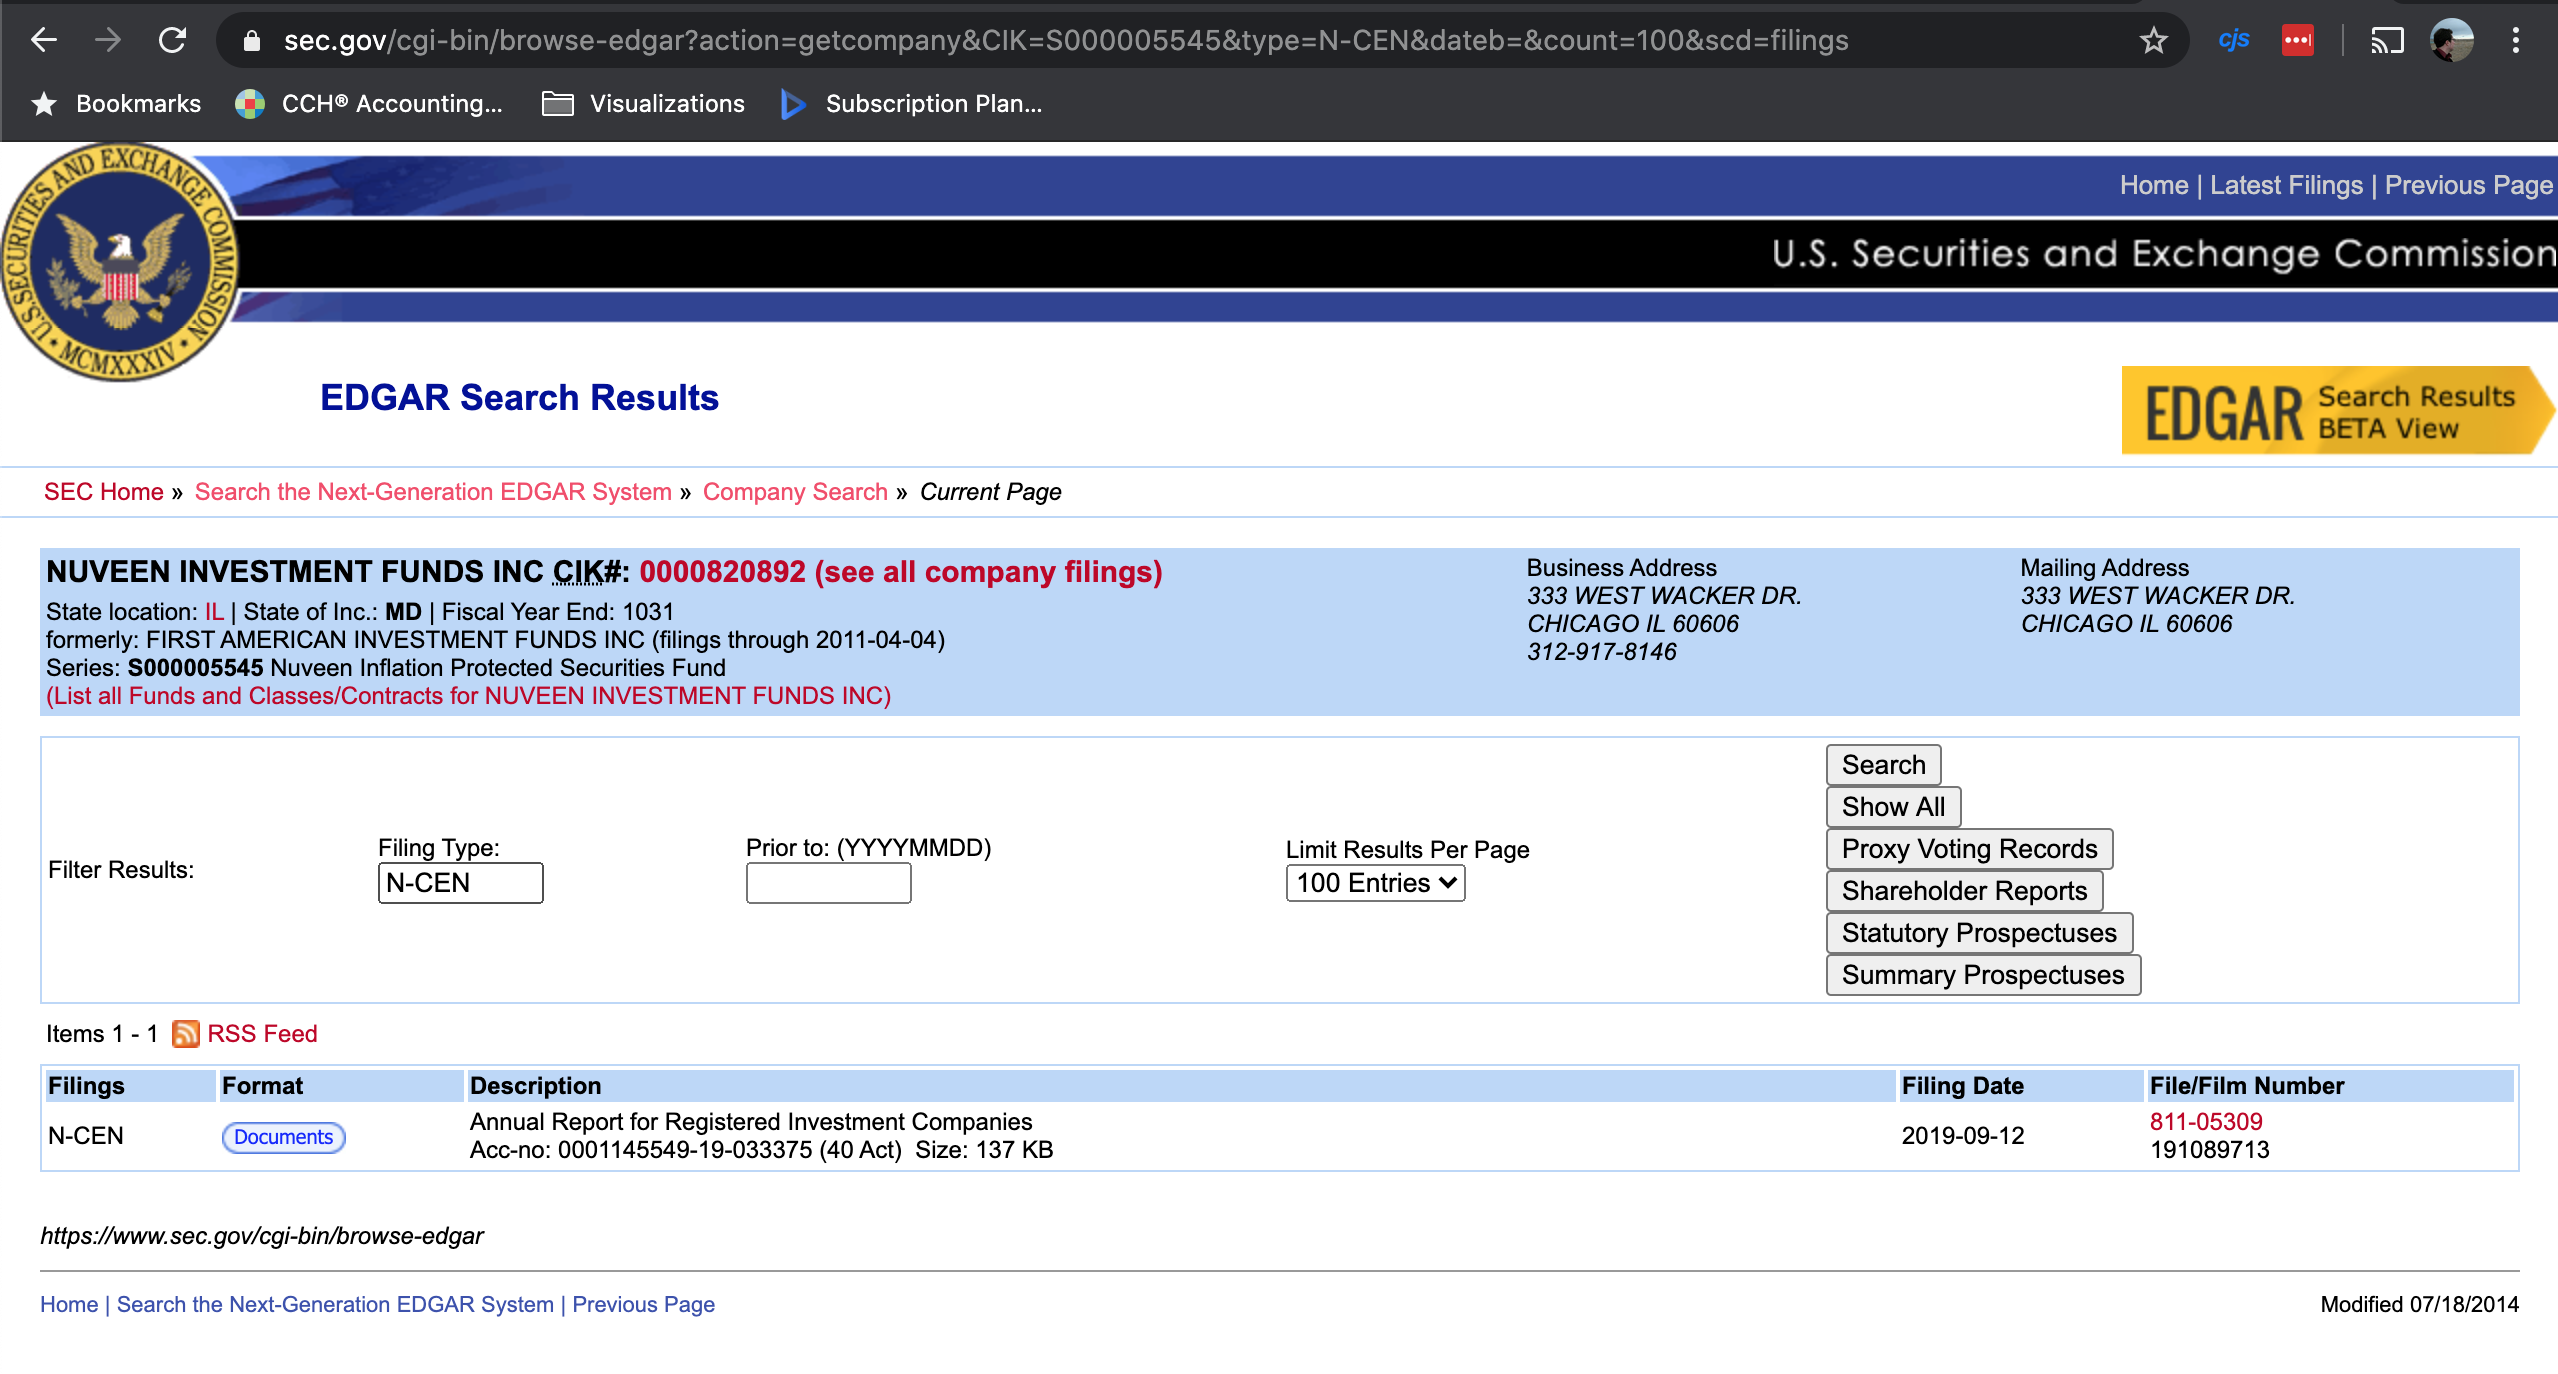